## Monte Carlo
It is possible to use different methods to compute approximations to $\pi$. 
One way is to use the so-called Monte Carlo method which uses random numbers to estimate $\pi$. 
Consider the figure below, which shows the unit disc inscribed in the unit square for $x,y\in [0,1]$. 
![image.png](attachment:image.png)

Denote the areas of the square and disc $A_s$ and $A_d$, respectively. Then of course $A_s=1$ and $A_d=\pi/4$ so 

$$
\frac{A_d}{A_s} = \frac{\pi}{4}.
$$

In the right-hand figure, a set of $N_{total}$ random points (uniformly distributed) have been plotted on the unit square. The points inside and outside the disc are coloured green and red, respectively. If the number of points inside the disc are denoted $N_{disc}$, then the ratio of $N_{disc}$ to $N_{total}$ is an approximation of the ratio of areas above, namely
$$
\frac{N_{disc}}{N_{total}} \approx \frac{\pi}{4} \Rightarrow \pi = 4 \frac{N_{disc}}{N_{total}}.
$$


**(a) [4 marks]** 

Write a function `estimate_pi_monte_carlo` which implements an algorithm for estimating $\pi$ by generating a sequence of $N_{total}$ uniformly distributed random numbers in the unit square, counting how many of those points land inside the unit circle, and then returning an approximation to $\pi$ given by the formula above.

The function should:
- take the number 'Ntotal' as input and raise a ValueError if the input is not a positive integer;
- return a float.

In [1]:
import random
def estimate_pi_monte_carlo(Ntotal):
    if Ntotal<0:
        raise ValueError
        
    if type(Ntotal)!=int:
        raise ValueError
        
    p = 0
    
    for i in range(Ntotal):
        p+= (1-random.random()**2)**.5
        piestimate= 4*p /Ntotal
        
    return piestimate

**(b) [4 marks]** 
Illustrate the Monte Carlo method of approximating $\pi$ by writing a function `draw_monte_carlo` which takes as input $N_{total}$ and draws the figures included above with two subplots of the unit square. 
- the left subplot should contain a green quarter circle and the rest red;
- the right subplot should contain a scatter plot of $N_{total}$ uniformly distributed random points;
- the points inside the unit circle should be coloured green and points outside coloured red;
- the unit circle itself should be coloured blue;
- the plot should have relevant labels and tick marks.

Write the function in the next cell and call the function in the following cell to render it.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def draw_monte_carlo(Ntotal):
    fig = plt.figure()
    ax1 = fig.add_subplot(221) 
    ax2 = fig.add_subplot(222) 
    
    #scatter plot
    
    xy = np.random.uniform(0, 1, 2 * Ntotal).reshape((2, Ntotal))
    inside_m = xy[0]**2 + xy[1]**2 <= 1
    pi = np.sum(inside_m) / Ntotal * 4
    inside_xy = xy[:, inside_m]
    outside_xy = xy[:, ~inside_m]
    

    ax2.scatter(*inside_xy,c='g')
    ax2.scatter(*outside_xy,c='r')
    ax2.set_aspect('equal')
    ax2.set_ylabel('y')
    ax2.set_xlabel('x')
    
    xc=np.linspace(0,1)
    yc=np.sqrt(1-xc**2)
    ax2.plot(yc,xc)
    
    #solid color plot
 
    cc = plt.Circle(( 0 , 0 ), 1 ,color='g') 

    ax1.set_aspect( 1 ) 
    ax1.add_artist( cc ) 
    ax1.add_patch(patches.Rectangle((0, 0), 1, 1,color='r'))
    ax1.set_ylabel('y')
    ax1.set_xlabel('x')
    plt.show()

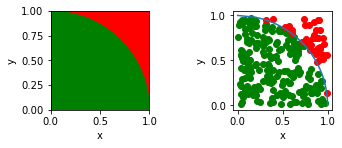

In [3]:
draw_monte_carlo(250)

**(c) [4 marks]**
An alternative method for approximating $\pi$ is to use the partial sum 

$$
S_n = \sum_{k=1}^{n}\frac{1}{k^2}
$$

since it is known that $S_n \to \frac{\pi^2}{6}$. 
(This formula was proven by Euler in 1734 and is a solution to the so-called Basel problem). 

Write a function `estimate_pi_euler` which takes a non-negative integer $n$ as input and returns an estimate of $\pi$ by using this formula for the given $n$. Your function should also raise a ValueError if the input is not a non-negative integer. 

In [4]:
def estimate_pi_euler(n):
    import math
    if n<0:
        raise ValueError
    if type(n)!=int:
        raise ValueError
    if n < 3:
        rn = 6
    else:
        rn = n*n
        while rn / math.log(rn) / 2 > n:
            rn //= 2

    num = list(range(3, rn, 2))
    primeodd = []
    
    for i in num:
        if i is not None:
            primeodd.append(i)
            
            if len(primeodd) >= n:
                break
                
            j = i
            while i * j < rn:
                num[(i*j-3) // 2] = None
                j += 2
                
    euproduct = 1
    
    for k in primeodd:
        if  k % 4 == 3:
            deno = k + 1
            
        else:
            deno = k - 1
            
        euproduct *= k / deno
    return euproduct * 4

**(d) [4 marks]** 
There are many many more ways to approximate $\pi$. One of the most efficient algorithms is using the following partial sums:

$$
S_n = {\frac {2{\sqrt {2}}}{9801}}\sum _{k=0}^{n }{\frac {(4k)!(1103+26390k)}{(k!)^{4}396^{4k}}}
$$

since it is know that $S_n \to \frac{1}{\pi}$ as $n\to \infty$. This series was discovered by Ramanujan in 1910 and versions of it are used for all record-breaking calculations for digits of $\pi$. 

Write a function `estimate_pi_ramanujan` which takes a non-negative integer $n$ as input and returns an estimate of $\pi$ by using this formula for the given $n$. Your function should also raise a ValueError if the input is not a non-negative integer. 


In [5]:
def estimate_pi_ramanujan(n):
    if n<0:
        raise ValueError
        
    if type(n)!=int:
        raise ValueError
        
    sum = 0
    n = 0
    I = (math.sqrt(8))/9801

    while True:
        tm = I * (math.factorial(4*n) / pow(math.factorial(n) , 4)) * ((26390*n + 1103)/pow(396 , 4*n))
        sum +=tm

        if(abs(tm) < 1e-15):
            break
        n += 1

    return(1/sum)

**(e) [4 marks]**
You should now compare the three methods that you have implemented above for estimating $\pi$.

(i) Call each of them (or as many as you have done) with the input parameters $100$ and $10^4$ and print the resulting values. 

(ii) Comparing with the value of `math.pi`, which method do you think is more efficient? 

Give your answers in a new markdown formatted cell below:


In [6]:
import math
# parameter=100

print('monte carlo pi estimate (100):',estimate_pi_monte_carlo(100))
print('euler pi estimate (100):',estimate_pi_euler(100))
print('ramanujan pi estimate (100):',estimate_pi_ramanujan(100))


# parameter=1000

print('monte carlo pi estimate (10**4):',estimate_pi_monte_carlo(10**4))
print('euler pi estimate (10**4):',estimate_pi_euler(10**4))
print('ramanujan pi estimate (10**4):',estimate_pi_ramanujan(10**4))

print('math.pi:',math.pi)

monte carlo pi estimate (100): 3.2535627915474605
euler pi estimate (100): 3.148427801913721
ramanujan pi estimate (100): 3.141592653589793
monte carlo pi estimate (10**4): 3.153237490374832
euler pi estimate (10**4): 3.142446291175159
ramanujan pi estimate (10**4): 3.141592653589793
math.pi: 3.141592653589793


## Recursion

The sequence of functions $F_n(x,y)$ for ($n\ge0$) is defined by the recurrence formula

$$
F_0(x,y)=1,\quad F_1(x,y)=\frac{x}{2} - y^2
$$
and 
$$
2n^2 F_{n+1}(x,y) = 2nxyF_n(x,y) - (2n+1)F_{n-1}(x,y),\quad n\ge 1.
$$

**(a) [5 marks]** Write a recursive function (i.e. a function that calls itself) `evalFn` which evaluates the function $F_n$ with the argument $x$ and $y$.
- The function should return a float if the input is a scalar;
- If the input x and y are both two-dimensional NumPy arrays then the output should also be a two-dimensional NumPy array;
- If the input are numpy arrays of different shapes it should raise a ValueError.

In [13]:
import numpy as np
def evalFn(n,x,y):
    
    #check if inputs x and y are both two-dimensional NumPy arrays
    #otherwise raise a ValueError
    if type(x)==np.ndarray and type(y)==np.ndarray:
        if x.shape!=y.shape:
            raise ValueError
            
    if n==0:
        if type(y)==np.ndarray:
            Fn= np.ones(y.shape) 
            return Fn
        
        else:
            Fn=1
            return Fn
        
    elif n==1:
        Fn= x/2 - y**2
        return Fn
    
    #evaluate Fn for n>1
    else:
        Fn= (x * y * evalFn(n-1,x,y) / (n-1)) - ((2*n - 1) * evalFn(n-2,x,y)
                                                 / (2 * (n-1)**2))
        return Fn

In [22]:

# Test that 'evalFn' returns the correct values for some input vectors.
import numpy as np
x = np.linspace(0,1,2)
y = np.linspace(0,1,3)
X,Y = np.meshgrid(x,y)
assert_true( (evalFn(0,X,Y)==np.ones((3,2))).all())
assert_equal(evalFn(3,X,Y)[0,0],0.0)
assert_almost_equal(evalFn(3,X,Y)[2,1],-0.6875,delta=1e-6)

In [24]:
# 1 mark
# Test that the 'evalFn' returns a numpy array of correct shape if the inputs are numpy arrays.
from nose.tools import assert_equal,assert_almost_equal,assert_raises,assert_true
import numpy as np
x = np.linspace(0,1,2)
y = np.linspace(0,1,3)
X,Y = np.meshgrid(x,y)
assert_equal(type(evalFn(0,X,Y)),np.ndarray)
assert_equal(type(evalFn(1,X,Y)),np.ndarray)
assert_equal(evalFn(1,X,Y).shape,(3,2),"Function should return a 3 x 2 grid!")

In [25]:
evalFn(3,np.linspace(0,1,3), np.linspace(0,1,3))

array([-0.    , -0.1875, -0.6875])

**(b) [5 marks]** 
Use your function from **(a)** to plot the surfaces $F_{n}(x, y)$ for $n = 0, 1, 2, 3, 4, 5$ and $−1 \le x, y \le 1$. Display the 6 plots in the same figure using subplots in two rows and three columns, labelling each plot clearly.
Insert the code for plotting in the cell below.

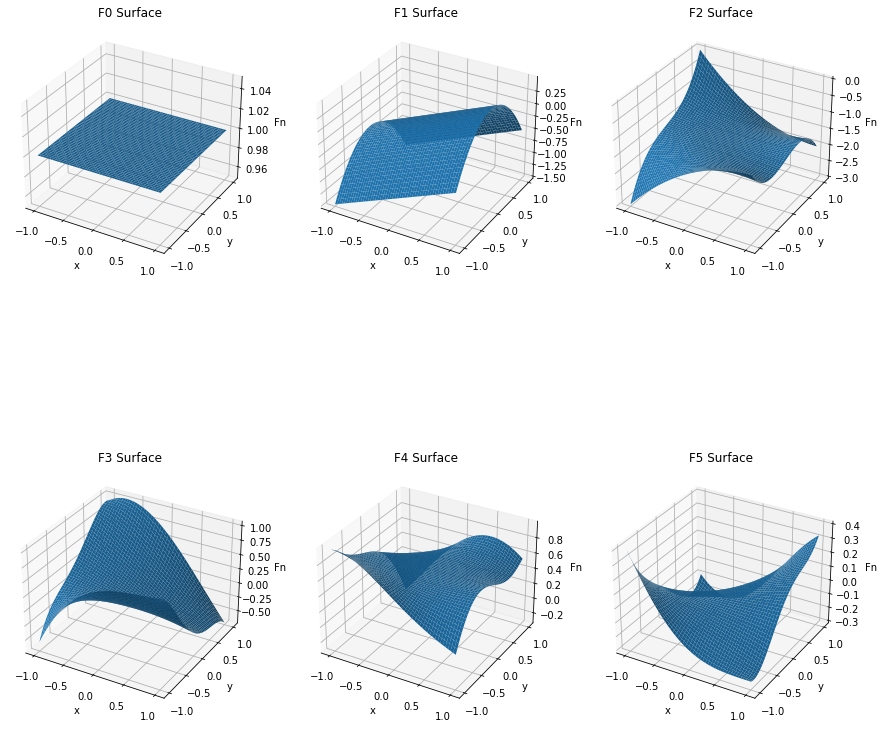

In [26]:
import numpy as np
import matplotlib.pyplot as plt

#initialize ploting
fig = plt.figure(figsize=(15,15))
n=0

#loop to plot n from 0 to 6
for i in range(0,6):
    
    ax = fig.add_subplot(231+n,projection='3d')
    xx= np.linspace(-1,1)
    yy= np.linspace(-1,1)
    XX,YY = np.meshgrid(xx,yy)
    Z= evalFn(n,XX,YY)
    ax.plot_surface(XX, YY, Z)
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_zlabel('Fn')
    title=('F{} Surface'.format(n))
    ax.set_title(title)

    n+=1

plt.show()


**(c)**
In addition to working numerically we can also use SymPy to study the functions $F_n$ symbolically and obtain explicit expressions.

(i) Use `SymPy` to write a function `symbolicFn` which gives an expression for $F_n(x,y)$ as a polynomial in $x$ and $y$ of the form 

$$
\sum_{i,j} a(n,i,j)x^i y^j.
$$

The function should take symbolic values for $x$ and $y$ (as given by e.g. `x, y = sympy.symbols('x y')`) as input and output a polynomial in $x$ and $y$ of the type `sympy.Poly`.

(ii) Call this function and compute explicit expressions of $F_n$ for $n=2,3$ and $4$ and give your answer in the indicated cell below.

Hints: you might find the functions .as_poly() and sympy.Poly useful.

In [27]:
import sympy
def symbolicFn(n,x,y):
    x, y = sympy.symbols('x y')
    
    if n==0:
        sym= sympy.Poly(1,x,y,domain='QQ')
        return sym
    
    else:
        sym= evalFn(n,x,y).as_poly()
        return sym

Insert the expressions you found for $F_2$, $F_3$ and $F_4$ here. Use LaTeX notation to display the polynomials. Recall that in Markdown LaTeX expressions are contained between \$\$ signs. For instance, the following:
```
$$
p_i(x,y) = \frac{4}{5}x^2 y^3 - \frac{1}{2} x^4 y^5 - 2 x
$$
```
displays as 
$$
p_i(x,y) = \frac{4}{5}x^2 y^3 - \frac{1}{2} x^4 y^5 - 2 x.
$$
To find the LaTeX expression of a given object in SymPy you can use the function sympy.latex(). For example:
```
sympy.latex(sympy.QQ(4)/sympy.QQ(5)*x**2*y**3) 
```
outputs '\\frac{4 x^{2} y^{3}}{5}'. Note that the '\\' sign is escaped as '\\\\' so you need to replace it by a single '\\'. 




In [28]:
import sympy

def symbolicFn(n,x,y):
    x, y = sympy.symbols('x y')
    
    if n==0:
        sym= sympy.Poly(1,x,y,domain='QQ')
        return sym
    
    else:
        sym= evalFn(n,x,y).as_poly()
        return sym

In [29]:
symbolicFn(2,x,y)

Poly(0.5*x**2*y - 1.0*x*y**3 - 1.5, x, y, domain='RR')

In [30]:
symbolicFn(3,x,y)

Poly(0.25*x**3*y**2 - 0.5*x**2*y**4 - 0.75*x*y - 0.3125*x + 0.625*y**2, x, y, domain='RR')

In [31]:
symbolicFn(4,x,y)

Poly(0.0833333333333333*x**4*y**3 - 0.166666666666667*x**3*y**5 - 0.25*x**2*y**2 - 0.298611111111111*x**2*y + 0.597222222222222*x*y**3 + 0.583333333333333, x, y, domain='RR')

**(d)**
Use SymPy to find the exact value of the integral 
$$
\int_{-1}^{1} \int_{-1}^{1} F_n(x,y)dx dy.
$$

for $n=3$ and $4$. Write your code to compute the integrals for a general $n$ in the function below. 
There will be a visible test for $n=3$ and a hidden test for $n=4$. 

In [ ]:
import sympy
def compute_integral(n):
    
    integral = sympy.nsimplify(sympy.integrate( evalFn(n,x,y) , (x,-1,1) , (y,-1,1) ))
    
    return integral

## Gram-Schmidt

The Gram-Schmidt process is an algorithm which can be used to construct a set of vectors $\{\mathbf{w}_i\}$ which are **orthonormal**, in other words they are pairwise orthogonal to each other and have lengths equal to 1. This condition can be  expressed in terms of the standard Euclidean scalar (or "dot") product as 

$$
\mathbf{w}_i \cdot \mathbf{w}_j = 
\begin{cases}
1 & \text{if } i = j,\\
0 & \text{if } i\ne j.
\end{cases}
$$

If the input to the Gram-Schmidt process is a set of $n$ linearly independent vectors $\{ \mathbf{v}_i \mid i=1,\ldots,n\}$ in $\mathbb{R}^{n}$, then the output will be a set of $n$ orthonormal vectors $\{\mathbf{w}_i \mid i=1,\ldots,n\}$ in $\mathbb{R}^{n}$.

In general, if the input vectors are not all linearly independent, then the output will be a set of $n$ vectors containing an orthonormal basis for the linear span of the vectors $\{ \mathbf{v}_i\}$ together with a number of zero-vectors.

The method is summarised by the following instructions:
- Construct an orthogonal set of vectors $\{\mathbf{w}_i\}$ using the formula: $\mathbf{w}_1=\mathbf{v}_1$ and 

$$
\mathbf{w}_i = \mathbf{v}_i - \sum_{j=1}^{i-1} \frac{\mathbf{v}_i\cdot \mathbf{w}_j}{\| \mathbf{w}_j\|}\mathbf{w}_j,\quad i>1.
$$

- If $\mathbf{w}_i$ from the previous step is not the zero vector $\mathbf{0}$, normalise it to have length 1 by setting 

$$
\mathbf{w}_i = \frac{\mathbf{w}_i}{\|\mathbf{w}_i \|}.
$$


**(a) [10 marks]**
Write a function `gram_schmidt_np` which takes an $n \times n$ matrix $V$ given as NumPy array as an input, where the columns of $V$ represent the set of $n$-dimensional vectors $\{\mathbf{v}_i\}$, then uses the Gram-Schmidt process to construct an orthonormal set of vectors $\{\mathbf{w}_i\}$, which are output as the columns of the matrix $W$.

- Your function should check that the input V is a square matrix of type np.ndarray, and raise a ValueError if not.
- In the normalisation step you can check if $w_i$ has norm less than $1\cdot 10^{-10}$ instead of checking if it is exactly 0 and in this case just replace it by the zero vector instead of normalising it. 


In [ ]:
import numpy as np

def gram_schmidt_np(V):
    if type(V)==int:
        raise ValueError
        
    if type(V)!= np.ndarray:
        raise ValueError
        
    if len(V[:,0])!=len(V[0,:]):
        raise ValueError

    n, k = V.shape
    E = np.empty((n, k))
    I = np.eye(n)

    c1 = V[:,0]
    E[:, 0] = c1 / np.sqrt(np.sum(c1 * c1))
        

    for i in range(1, k):
        r = V[: , i]    
        S = V[: , 0:i]    

        M = I - S @ np.linalg.inv(S.T @ S) @ S.T
        u = M @ r

        E[:, i] = u / np.sqrt(np.sum(u * u))
        
        if np.linalg.det(V)!=0:
            return E
        
        else:
            e = np.zeros(V.shape)
            e[len(V)-1][len(V)-1]=1
            return E+e


Instead of using NumPy for working with vectors it is also posible to use SymPy.

**(b) [10 marks]** 

Write a function `gram_schmidt_sp` which takes an $n \times n$ square matrix $V$ given as a SymPy Matrix as input, where the columns of $V$ represent the set of $n$-dimensional vectors $\{\mathbf{v}_i\}$, then uses the Gram-Schmidt process to construct an orthonormal set of vectors $\{\mathbf{w}_i\}$, which are output as the columns of a new $n\times n$ square SymPy  matrix $W$.
- Your function should check that the input V is a square matrix of type sympy.Matrix, and raise a ValueError if not.

Note: while the algorithm is the same as above you will need to figure out for yourself how to extract columns from a SymPy matrix (the columns will themselves be $n \times 1$ matrices), how to take the dot product and norm of a SymPy matrix and how to join columns to make a new SymPy matrix. (Hint: The function sympy.Matrix.row_join can be useful.)

In [ ]:
import sympy
def gram_schmidt_sp(V):
    
    if type(V)!=sympy.Matrix:
        raise ValueError
        
    if len(V[:,0])!=len(V[0,:]):
        raise ValueError
        
    R=len(V[:,0])
    C=len(V[0,:])  
    G=sympy.zeros(R,C)
    
    for i in range(C):
        Q= V[:,i] - G[:,:i] * G[:,:i].T * V[:,i]
        
        if Q.norm()<1e-10:
            Q=sympy.zeros(R,1)
            
        else:
            Q=Q/Q.norm()
            
        G[:,i]=Q
    return G